In [24]:
import torch
import torch.nn as nn
import gym
from IPython.display import Image

In [25]:
class DQN(nn.Module):
    def __init__(self, obs_space, act_space, device):
        super(DQN, self).__init__()
        self.obs_space = obs_space
        self.act_space = act_space
        self.device = device
        
        self.backbone = nn.Sequential(
            nn.Linear(self.obs_space, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, self.act_space),
        ).to(self.device)
        

    def forward(self, obs):
        obs = obs if torch.is_tensor(obs) else torch.from_numpy(obs).to(self.device)
        obs = obs.view(-1, self.obs_space)
        logit = self.backbone(obs)
        return logit
    
    @torch.no_grad()
    def get_action(self, obs, epsilon):
        if torch.rand(1) < epsilon:
            return torch.randint(0, self.act_space, (1,))
        else:
            obs = torch.from_numpy(obs).view(-1, self.obs_space).to(self.device)
            qs = self.forward(obs)
            return torch.argmax(qs, dim=1)

Episodic rewards across training of `dqn_state_model250000.pt`

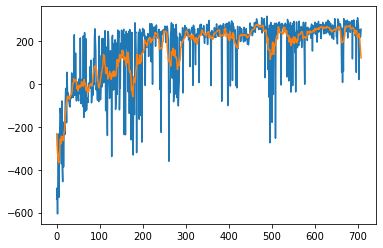

In [26]:
Image(filename="images/ep_rewards.png")

In [27]:
env = gym.make('LunarLander-v2')
device = "cuda" if torch.cuda.is_available() else "cpu"
obs_space = env.observation_space.shape[0]
act_space = env.action_space.n

dqn = DQN(obs_space, act_space, device)
dqn.load_state_dict(torch.load('models/dqn_state_model_trained.pt'))

obs = env.reset()
done = False
while not done:
    action = dqn.get_action(obs, 0).item()
    obs, reward, done, _ = env.step(action)
    env.render()
env.close()
    